In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from neuropacks import PVC11
from noise_correlations import (analysis,
                                discriminability,
                                null_models,
                                utils,
                                plot)
from pratplot import colorbar as pcb
from scipy.stats import special_ortho_group

%matplotlib inline

# Low Dimensional

In [3]:
dim = 3

In [4]:
sog = special_ortho_group(dim=dim)

In [5]:
eigs = np.sort(dim * np.array([0.75, 0.20, 0.05]))
eigs_uni = np.sort(dim * np.array([0.40, 0.30, 0.30]))

In [6]:
base = np.diag(eigs)
base_uni = np.diag(eigs_uni)

In [7]:
rng = np.random.RandomState(2332)

In [8]:
mu = np.random.uniform(low=0, high=1, size=dim)
mu /= np.linalg.norm(mu)

In [9]:
n_rotations = 10000
lfis = np.zeros(n_rotations)
lfis_uni = np.zeros(n_rotations)

In [10]:
for rotation in range(n_rotations):
    R = sog.rvs(random_state=rng)
    cov = R @ base @ R.T
    lfis[rotation] = mu @ np.linalg.solve(cov, mu)
    cov = R @ base_uni @ R.T
    lfis_uni[rotation] = mu @ np.linalg.solve(cov, mu)

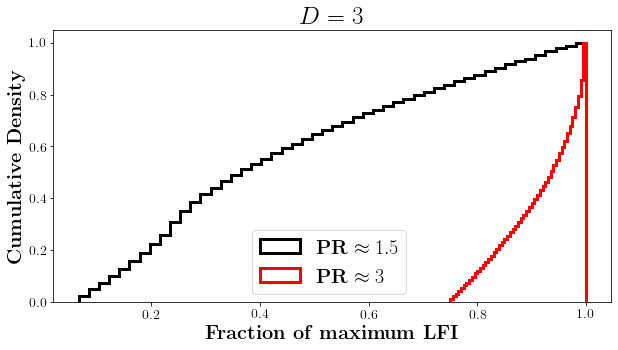

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(lfis * eigs[0],
        bins=50,
        cumulative=True,
        density=True,
        histtype='step',
        linewidth=3,
        color='black',
        label=r'$\textbf{PR}\approx 1.5$')
ax.hist(lfis_uni * eigs_uni[0],
        bins=50,
        cumulative=True,
        density=True,
        histtype='step',
        linewidth=3,
        color='r',
        label=r'$\textbf{PR}\approx 3$')

ax.set_xlabel(r'\textbf{Fraction of maximum LFI}', fontsize=20)
ax.set_ylabel(r'\textbf{Cumulative Density}', fontsize=20)
ax.set_title(r'$D=3$', fontsize=25)
ax.legend(loc='best', bbox_to_anchor=(0.65, 0.30), prop={'size': 20})
ax.tick_params(labelsize=14)

# High Dimensional

In [37]:
dim = 50

In [46]:
sog = special_ortho_group(dim=dim)

In [38]:
eig_leading = np.array([0.40, 0.22, 0.15, 0.08])
pr = 4
remaining_eigs = np.random.uniform(low=0, high=1, size=dim - pr)
remaining_eigs /= remaining_eigs.sum () / (1 - eig.sum())
eigs = dim * np.sort(np.concatenate((eig_leading, remaining_eigs)))

In [41]:
eigs_uni= np.random.uniform(low=0, high=1, size=dim)
eigs_uni /= eigs_uni.sum() / eigs.sum()
eigs_uni = np.sort(eigs_uni)

In [43]:
rng = np.random.RandomState(2332)

In [44]:
base = np.diag(eigs)
base_uni = np.diag(eigs_uni)

In [47]:
mu = np.random.uniform(low=0, high=1, size=dim)
mu /= np.linalg.norm(mu)

In [53]:
n_rotations = 20000
lfis = np.zeros(n_rotations)
lfis_uni = np.zeros(n_rotations)

In [54]:
for rotation in range(n_rotations):
    R = sog.rvs(random_state=rng)
    cov = R @ base @ R.T
    lfis[rotation] = mu @ np.linalg.solve(cov, mu)
    cov = R @ base_uni @ R.T
    lfis_uni[rotation] = mu @ np.linalg.solve(cov, mu)

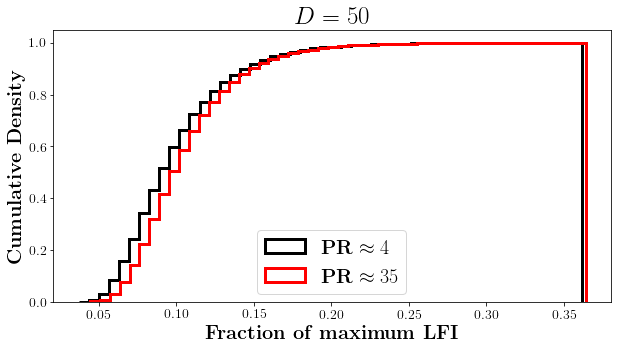

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(lfis * eigs[0],
        bins=50,
        cumulative=True,
        density=True,
        histtype='step',
        linewidth=3,
        color='black',
        label=r'$\textbf{PR}\approx 4$')
ax.hist(lfis_uni * eigs_uni[0],
        bins=50,
        cumulative=True,
        density=True,
        histtype='step',
        linewidth=3,
        color='r',
        label=r'$\textbf{PR}\approx 35$')

ax.set_xlabel(r'\textbf{Fraction of maximum LFI}', fontsize=20)
ax.set_ylabel(r'\textbf{Cumulative Density}', fontsize=20)
ax.set_title(r'$D=50$', fontsize=25)
ax.legend(loc='best', bbox_to_anchor=(0.65, 0.30), prop={'size': 20})
ax.tick_params(labelsize=14)